In [20]:
#Referencia > https://gsnchez.com/blog/article/El-metodo-de-monte-carlo
import pandas_datareader.data as web
import numpy as np
from scipy.stats import norm

In [21]:
#get data from pandas datareader yahoo of Apple
df = web.DataReader(['AAPL'], data_source='yahoo', start='2022-05-01', end='2022-11-01')
#show data
df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-05-02,157.248627,157.960007,158.229996,153.270004,156.710007,123055300.0
2022-05-03,158.761765,159.479996,160.710007,156.320007,158.149994,88966500.0
2022-05-04,165.272308,166.020004,166.479996,159.259995,159.669998,108256500.0
2022-05-05,156.063980,156.770004,164.080002,154.949997,163.850006,130525300.0
2022-05-06,156.801712,157.279999,159.440002,154.179993,156.009995,116124600.0
...,...,...,...,...,...,...
2022-10-26,149.102661,149.350006,151.990005,148.039993,150.960007,88194300.0
2022-10-27,144.560196,144.800003,149.050003,144.130005,148.070007,109180200.0


In [22]:
#Formula para precios actuales y anteriores
#price_today = price_previous * e^(r)

#Calcular r se usa el metodo browniano, consta de dos partes, volatilidad y drift
log_value = np.log(1 + df['Adj Close'].pct_change())

In [23]:
#cacular drift
mean = log_value.mean()
variance = log_value.var()
drift = mean - (0.5 * variance)

In [24]:
#calcular volatilidad
stdev = log_value.std().values
days_simulation = 30
iterations = 50
Z_value = norm.ppf(np.random.rand(days_simulation, iterations))
volatility = stdev * Z_value


In [25]:
#Calcular exponencial
daily_returns = np.exp(drift.values + volatility)


In [26]:
#Make the arrays for price calculations
prices = np.zeros_like(daily_returns)
prices[0] = df['Adj Close'].iloc[-1]

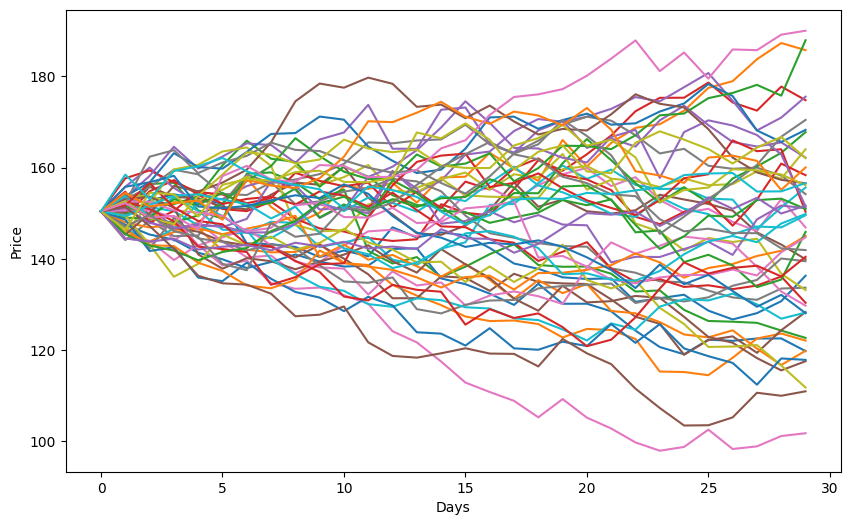

In [27]:
#Simulacion Monte Carlo
for t in range(1, days_simulation):
    prices[t] = prices[t - 1] * daily_returns[t]

#Graficar
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(prices)
#Labels
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


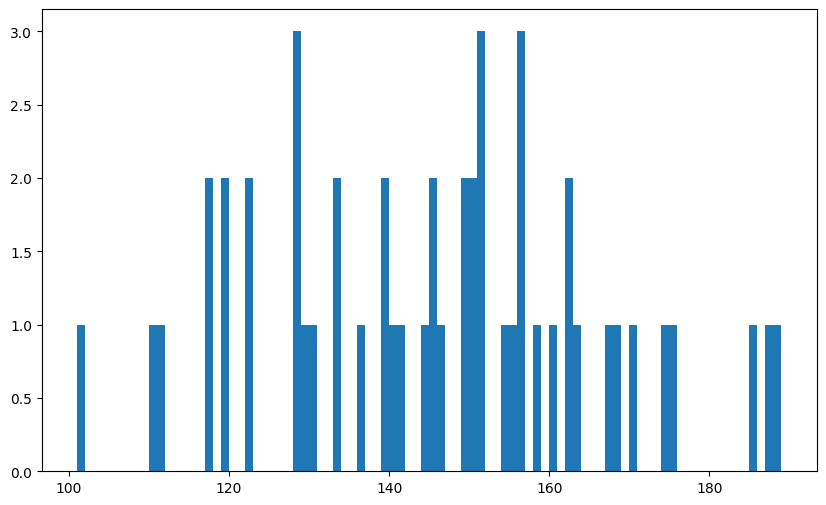

In [28]:
#Convertir a entero los precios
prices = prices.astype(int)
#Graficar frecuencia 
plt.figure(figsize=(10, 6))
plt.hist(prices[-1], bins=max(prices[-1]) - min(prices[-1]))
plt.show()

In [29]:
#Get table of frequencies 
unique, counts = np.unique(prices[-1], return_counts=True)
dict(zip(unique, counts))
#Show as table
import pandas as pd
pd.DataFrame(dict(zip(unique, counts)), index=['Frequency']).T
#Sort by frequency
frecuencias = pd.DataFrame(dict(zip(unique, counts)), index=['Frequency']).T.sort_values(by='Frequency', ascending=False)
#Get lower price
keys = list(frecuencias.index)
#Sort keys 
keys.sort()
#Get lower price
lower_price = keys[0]

#Get price of higher frequency
higher_price = frecuencias.index[0]

In [30]:
#Make recommendation
if higher_price > lower_price:
    print('Comprar')

if higher_price < lower_price:
    print('Vender')

if higher_price == lower_price:
    print('Mantener')

Comprar


In [31]:
print("El usuario deberia comprar cuando el precio sea: ", lower_price)

El usuario deberia comprar cuando el precio sea:  101


In [32]:
print("El usuario deberia vender cuando el precio sea: ", higher_price)

El usuario deberia vender cuando el precio sea:  151


In [33]:
#Earns
earnings = higher_price - lower_price
print("El usuario ganaria: ", earnings)

El usuario ganaria:  50


## Function to get the data

In [34]:
def get_simulation(df, iterations = 50, days_simulation = 30):
	log_value = np.log(1 + df['Adj Close'].pct_change())
	#cacular drift
	mean = log_value.mean()
	variance = log_value.var()
	drift = mean - (0.5 * variance)
	#calcular volatilidad
	stdev = log_value.std().values
	Z_value = norm.ppf(np.random.rand(days_simulation, iterations))
	volatility = stdev * Z_value
	#Calcular exponencial
	daily_returns = np.exp(drift.values + volatility)
	#Make the arrays for price calculations
	prices = np.zeros_like(daily_returns)
	prices[0] = df['Adj Close'].iloc[-1]
	#Simulacion Monte Carlo
	for t in range(1, days_simulation):
		prices[t] = prices[t - 1] * daily_returns[t]

	#Graficar
	import matplotlib.pyplot as plt
	plt.figure(figsize=(10, 6))
	plt.plot(prices)
	#Labels
	plt.xlabel('Days')
	plt.ylabel('Price')
	plt.show()
	#Convertir a entero los precios
	prices = prices.astype(int)
	#Graficar frecuencia 
	plt.figure(figsize=(10, 6))
	plt.hist(prices[-1], bins=max(prices[-1]) - min(prices[-1]))
	plt.show()
	#Get table of frequencies 
	unique, counts = np.unique(prices[-1], return_counts=True)
	dict(zip(unique, counts))
	#Show as table
	import pandas as pd
	pd.DataFrame(dict(zip(unique, counts)), index=['Frequency']).T
	#Sort by frequency
	frecuencias = pd.DataFrame(dict(zip(unique, counts)), index=['Frequency']).T.sort_values(by='Frequency', ascending=False)
	keys = sorted(frecuencias.index)
	#Get lower price
	lower_price = keys[0]

	#Get price of higher frequency
	higher_price = frecuencias.index[0]
	print("El usuario deberia comprar cuando el precio sea: ", lower_price)
	print("El usuario deberia vender cuando el precio sea: ", higher_price)
	#Earns
	earnings = higher_price - lower_price
	print("El usuario ganaria: ", earnings)

## Google stock prices

In [36]:
#get data from pandas datareader yahoo of Apple
df_google = web.DataReader(['GOOG'], data_source='yahoo', start='2022-05-01', end='2022-11-01')
df_google

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2022-05-02,117.156998,117.156998,117.339500,113.399498,113.906502,30280000.0
2022-05-03,118.129501,118.129501,119.300003,116.626999,116.764999,21216000.0
2022-05-04,122.574997,122.574997,123.142998,115.738503,118.003502,33232000.0
2022-05-05,116.746498,116.746498,121.233253,115.182503,120.220497,43090000.0
2022-05-06,115.660004,115.660004,117.498497,114.142998,115.518997,35310000.0
...,...,...,...,...,...,...
2022-10-26,94.820000,94.820000,98.540001,94.570000,96.760002,71504300.0
2022-10-27,92.599998,92.599998,95.169998,91.900002,94.309998,54036500.0


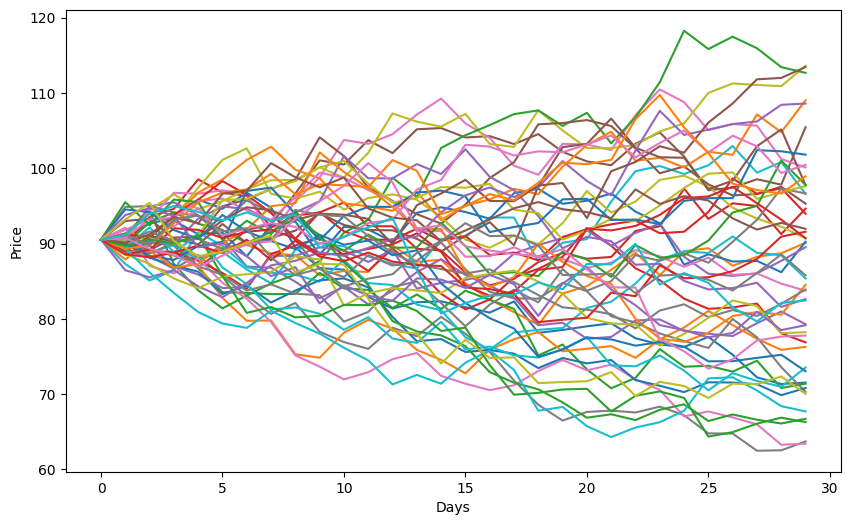

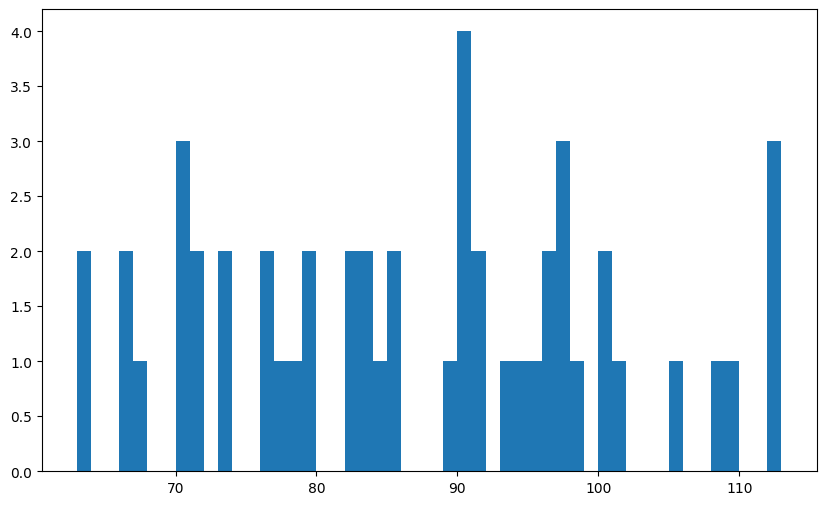

El usuario deberia comprar cuando el precio sea:  63
El usuario deberia vender cuando el precio sea:  90
El usuario ganaria:  27


In [37]:
get_simulation(df_google)

## Amazon stock prices

In [38]:
df_amazon = web.DataReader(['AMZN'], data_source='yahoo', start='2022-05-01', end='2022-11-01')
df_amazon

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2022-05-02,124.500000,124.500000,124.667999,118.375000,122.401001,148788000.0
2022-05-03,124.253502,124.253502,126.220497,122.824997,124.053497,79134000.0
2022-05-04,125.928497,125.928497,126.000000,119.182999,123.599998,110746000.0
2022-05-05,116.406998,116.406998,123.499001,115.072502,123.000000,144392000.0
2022-05-06,114.772499,114.772499,119.050499,113.081497,114.849998,124260000.0
...,...,...,...,...,...,...
2022-10-26,115.660004,115.660004,119.349998,114.760002,116.000000,68802300.0
2022-10-27,110.959999,110.959999,114.120003,109.769997,113.919998,129605400.0


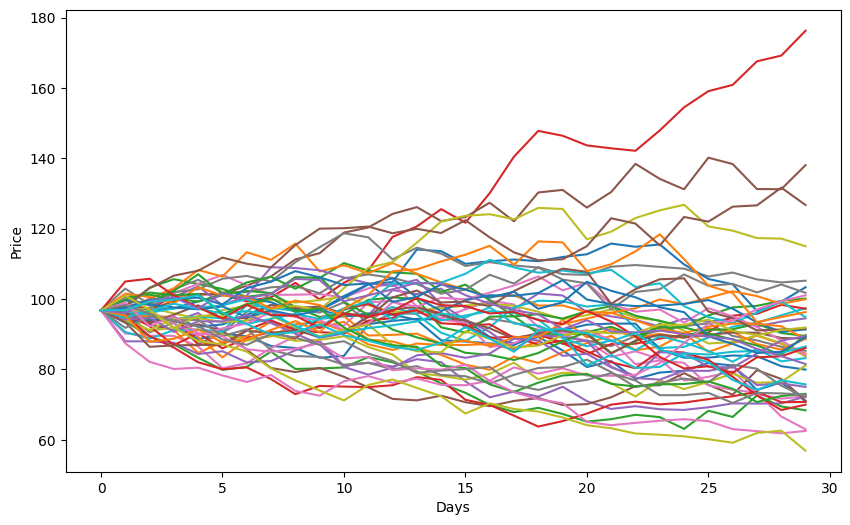

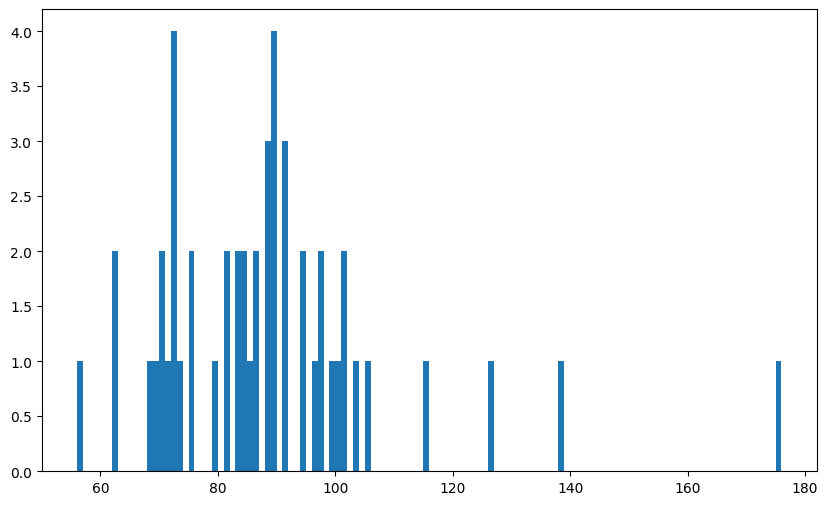

El usuario deberia comprar cuando el precio sea:  56
El usuario deberia vender cuando el precio sea:  89
El usuario ganaria:  33


In [39]:
get_simulation(df_amazon)

## Microsoft stock price

In [40]:
df_microsoft = web.DataReader(['MSFT'], data_source='yahoo', start='2022-05-01', end='2022-11-01')
df_microsoft

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2022-05-02,283.207855,284.470001,284.940002,276.220001,277.709991,35151100.0
2022-05-03,280.529785,281.779999,284.130005,280.149994,283.959991,25978600.0
2022-05-04,288.693390,289.980011,290.880005,276.730011,282.589996,33599300.0
2022-05-05,276.119446,277.350006,286.350006,274.339996,285.540009,43260400.0
2022-05-06,273.511047,274.730011,279.250000,271.269989,274.809998,37780300.0
...,...,...,...,...,...,...
2022-10-26,231.320007,231.320007,238.300003,230.059998,231.169998,82543200.0
2022-10-27,226.750000,226.750000,233.690002,225.779999,231.039993,40424600.0


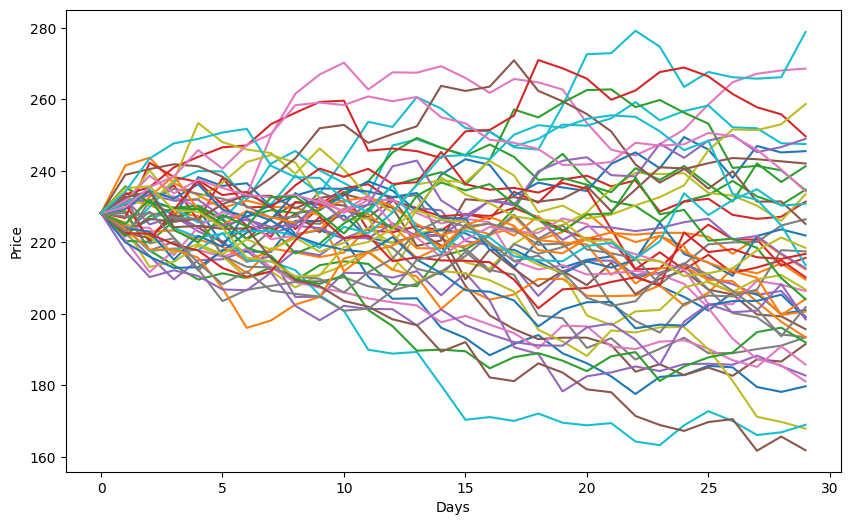

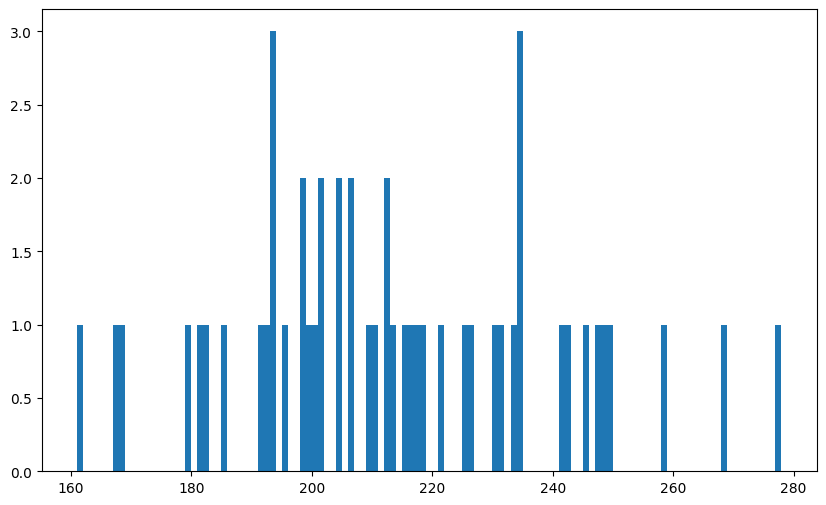

El usuario deberia comprar cuando el precio sea:  161
El usuario deberia vender cuando el precio sea:  234
El usuario ganaria:  73


In [41]:
get_simulation(df_microsoft)